# Movie Analysis from 1995 - 2018
This dataset contains genre statistics for movies released between 1995 and 2018. It provides information on various aspects of the movies, such as gross revenue, tickets sold, and inflation-adjusted figures. The dataset includes columns for genre, year of release, number of movies released in each genre and year, total gross revenue generated by movies in each genre and year, total number of tickets sold for movies in each genre and year, inflation-adjusted gross revenue that takes into account changes in the value of money over time, title of the highest-grossing movie in each genre and year, gross revenue generated by the highest-grossing movie in each genre and year, and inflation-adjusted gross revenue of the highest-grossing movie in each genre and year. This dataset offers insights into film industry trends over a span of more than two decades

In [2]:
# first import the few nescessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# let's check the dataset now what is its shape and features etc etc
df = pd.read_csv("ThrowbackDataThursday Week 11 - Film Genre Stats.csv")
print(df.shape)
print(df.columns)
df.head(5)

(300, 10)
Index(['index', 'Genre', 'Year', 'Movies Released', 'Gross', 'Tickets Sold',
       'Inflation-Adjusted Gross', 'Top Movie', 'Top Movie Gross (That Year)',
       'Top Movie Inflation-Adjusted Gross (That Year)'],
      dtype='object')


,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [4]:
df.isnull().sum()

index                                             0
Genre                                             0
Year                                              0
Movies Released                                   0
Gross                                             0
Tickets Sold                                      0
Inflation-Adjusted Gross                          0
Top Movie                                         0
Top Movie Gross (That Year)                       0
Top Movie Inflation-Adjusted Gross (That Year)    0
dtype: int64

## It's time to do some EDA (Exploratory Data Analysis)


In [5]:
# let's check how many different Genres are there
df['Genre'].unique()

array(['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller or Suspense',
       'Horror', 'Romantic Comedy', 'Musical', 'Documentary',
       'Dark Comedy', 'Western', 'Concert or Performance',
       'Multiple Genres', 'Reality'], dtype=object)

<Axes: xlabel='Year'>

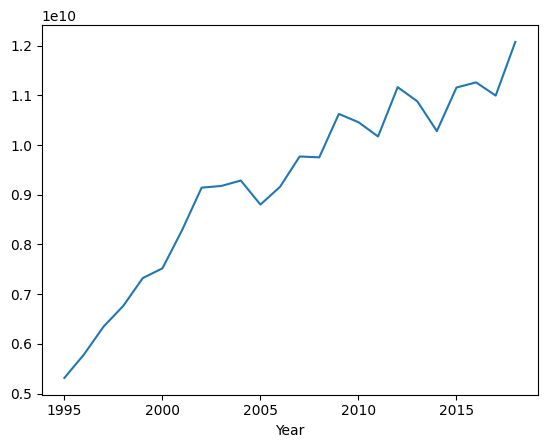

In [6]:
# check the gross revenue trends
revenue = df.groupby(['Year'])['Gross'].sum()
revenue.plot()

<Axes: xlabel='Year'>

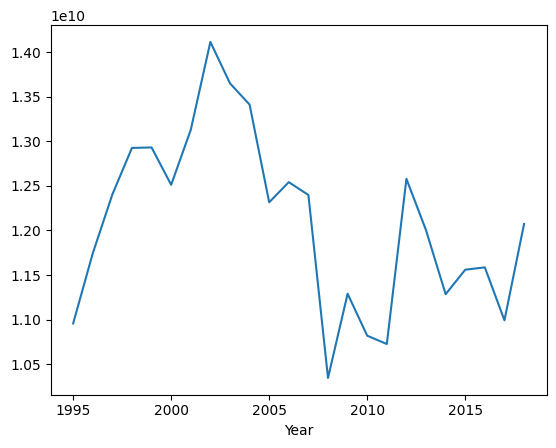

In [7]:
# check the inflation corrected revenue trends
inflation_revenue = df.groupby(['Year'])['Inflation-Adjusted Gross'].sum()
inflation_revenue.plot()

Revenue was up till about 2002-2003 then came a down trend till 2008 then again it is increasing. Though in 2020 came OTT revolution along with the Covid, scenarios must be different after 2020. 

<Axes: xlabel='Year'>

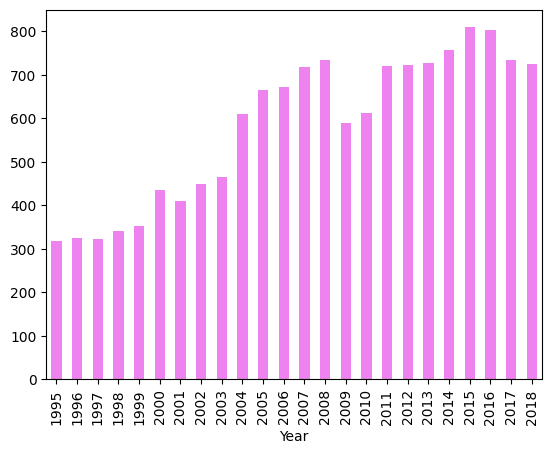

In [8]:
num_movies = df.groupby(['Year'])['Movies Released'].sum()
num_movies.plot(kind='bar',color='violet')

Number of movies made per year including all the Genres has almost doubled since 1995

<Axes: xlabel='Year'>

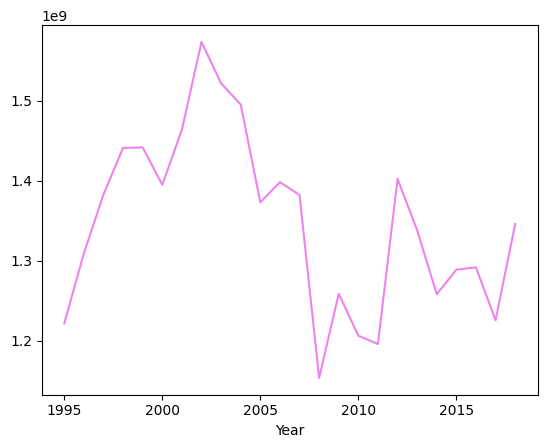

In [9]:
tickets_sold = df.groupby(['Year'])['Tickets Sold'].sum()
tickets_sold.plot(color='violet')

There is a correlation of inflation-adjusted collection and number of tickets sold, we can say both has not changed much over the years. Whenever there was a drop in number of tickets sold there was a drop in inflation adjusted gross collection as well.

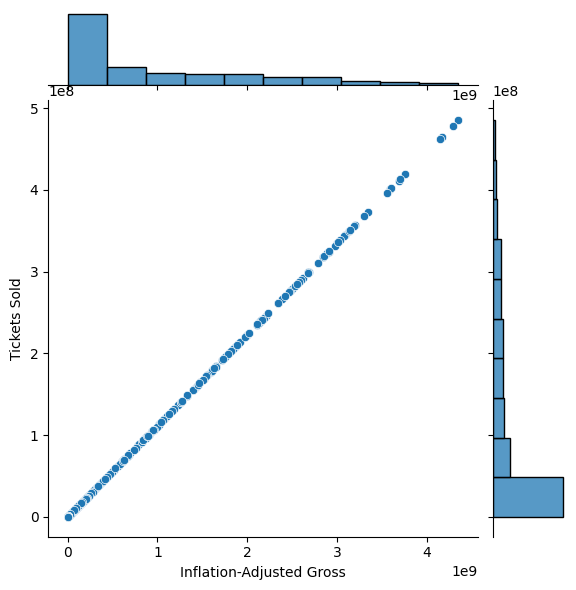

In [10]:
# lets check the correlation between 'Inflation-Adjusted Gross' and 'Tickets Sold'
sns.jointplot(x='Inflation-Adjusted Gross', y='Tickets Sold', data=df, kind="scatter")
plt.show()

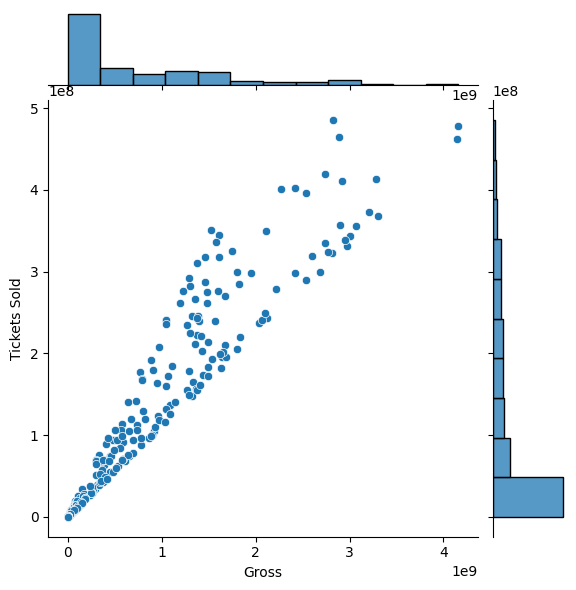

In [11]:
# but with gross
sns.jointplot(x='Gross', y='Tickets Sold', data=df, kind="scatter")
plt.show()

In [12]:
df['Genre'].unique()

array(['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller or Suspense',
       'Horror', 'Romantic Comedy', 'Musical', 'Documentary',
       'Dark Comedy', 'Western', 'Concert or Performance',
       'Multiple Genres', 'Reality'], dtype=object)

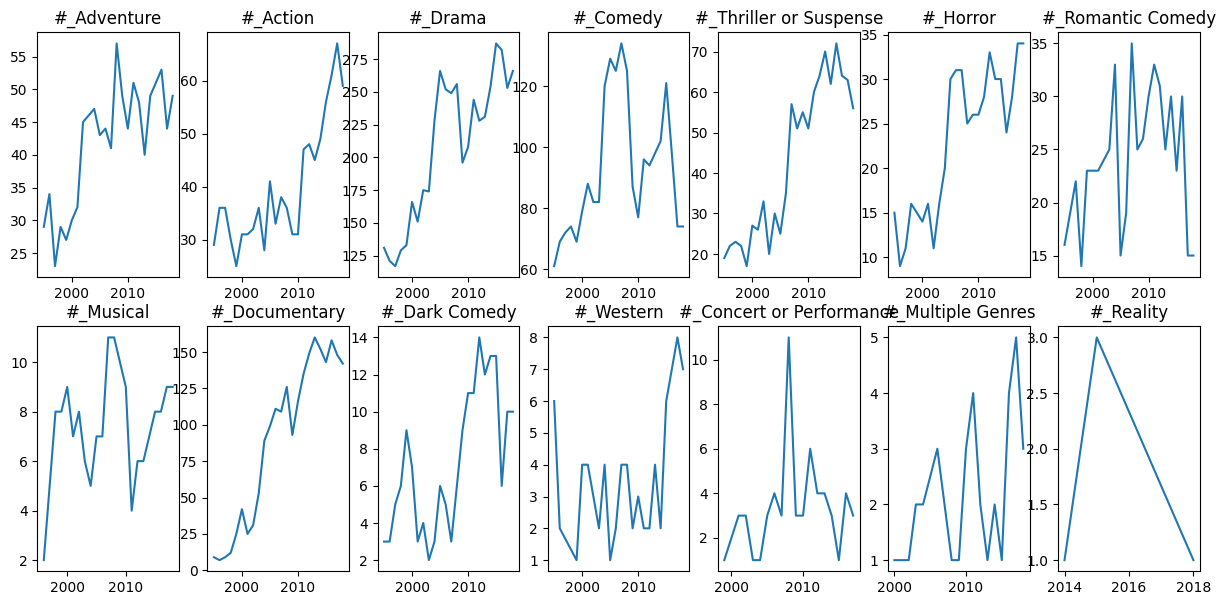

In [13]:
# now let's check trends in number movies released per year with respect to gneres

num_rows = 2; num_cols = 7
fig, axes = plt.subplots(num_rows,num_cols,figsize=(15,7))

for ax, feature_name in zip(axes.flat,df['Genre'].unique()):
    #print(feature_name)
    save_name = feature_name
    feature_name = df[df['Genre']==feature_name]
    ax.set_title('#_'+ save_name)
    ax.plot(feature_name['Year'],feature_name['Movies Released'])

There are some dramatic observations. There is sharp rise in the number of Adventure, Action, Thriller, Drama, Horror, Documentary movies made per year; whereas Western movies got very popular after 2015 or so and Concerts were very popular near 2008-2009 then slowly decreased the popularity.

In [14]:
selected_genres = ['Action', 'Comedy', 'Drama', 'Adventure']

filtered_df = df[df['Genre'].isin(selected_genres)]

fig = px.line(filtered_df, x='Year', y='Movies Released', color='Genre',
              title='Movie Releases Over Time for Selected Genres',
              labels={'Movies Released': 'Number of Movies Released'},
              line_shape='linear')

fig.show()

In [15]:
# there are only three years of data of reality shows
df[df['Genre']=='Reality'].head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,18469.0000
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,329104.4439
299,299,Reality,2018,1,2027,225,2018,The Cage Fighter,2027,2018.0000


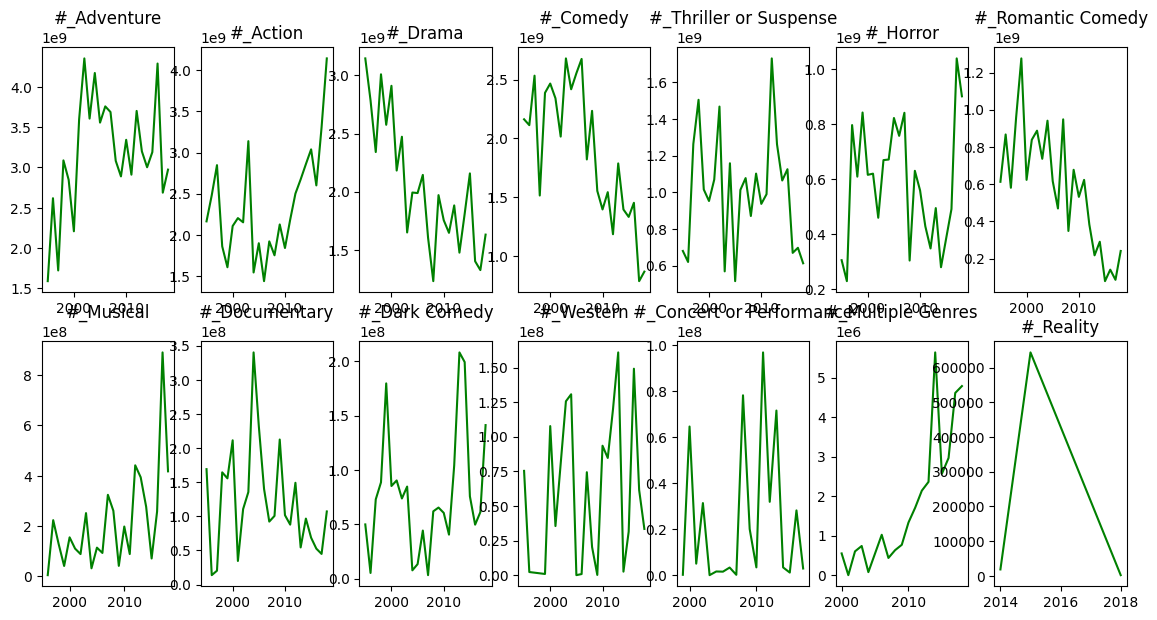

In [16]:
# let's check their Inflation-Adjusted Gross increased or not
num_rows = 2; num_cols = 7
fig, axes = plt.subplots(num_rows,num_cols,figsize=(14,7))

for ax, feature_name in zip(axes.flat,df['Genre'].unique()):
    #print(feature_name)
    save_name = feature_name
    feature_name = df[df['Genre']==feature_name]
    ax.set_title('#_'+ save_name)
    ax.plot(feature_name['Year'],feature_name['Inflation-Adjusted Gross'],color='green')

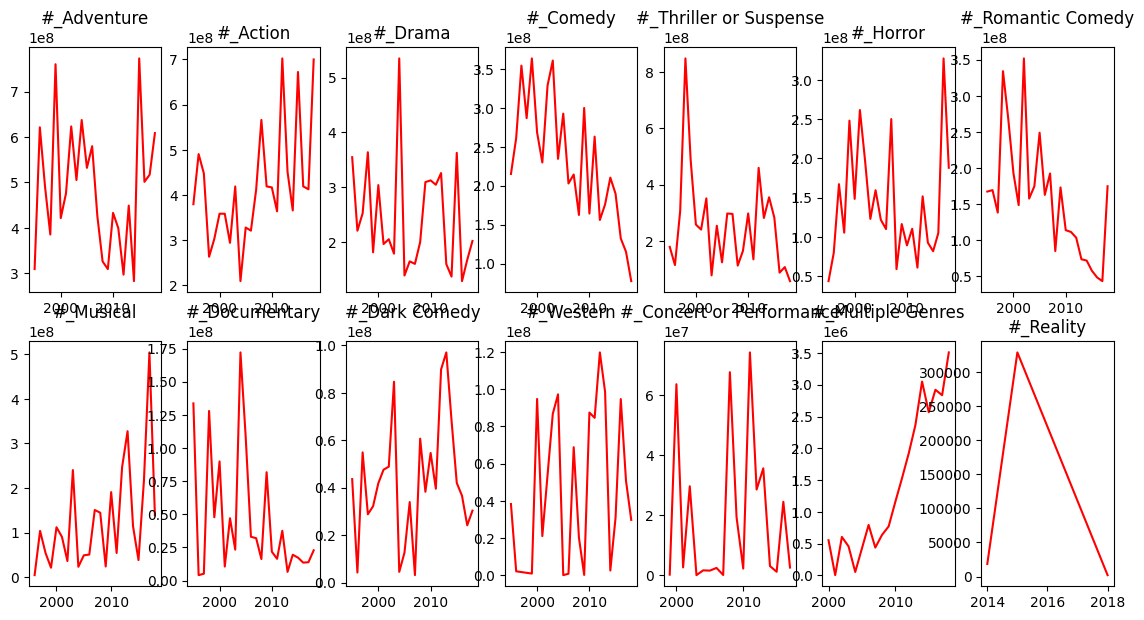

In [17]:
# let's check their top movie of the year Gross increased or not
num_rows = 2; num_cols = 7
fig, axes = plt.subplots(num_rows,num_cols,figsize=(14,7))

for ax, feature_name in zip(axes.flat,df['Genre'].unique()):
    #print(feature_name)
    save_name = feature_name
    feature_name = df[df['Genre']==feature_name]
    ax.set_title('#_'+ save_name)
    ax.plot(feature_name['Year'],feature_name['Top Movie Inflation-Adjusted Gross (That Year)'],color='red')

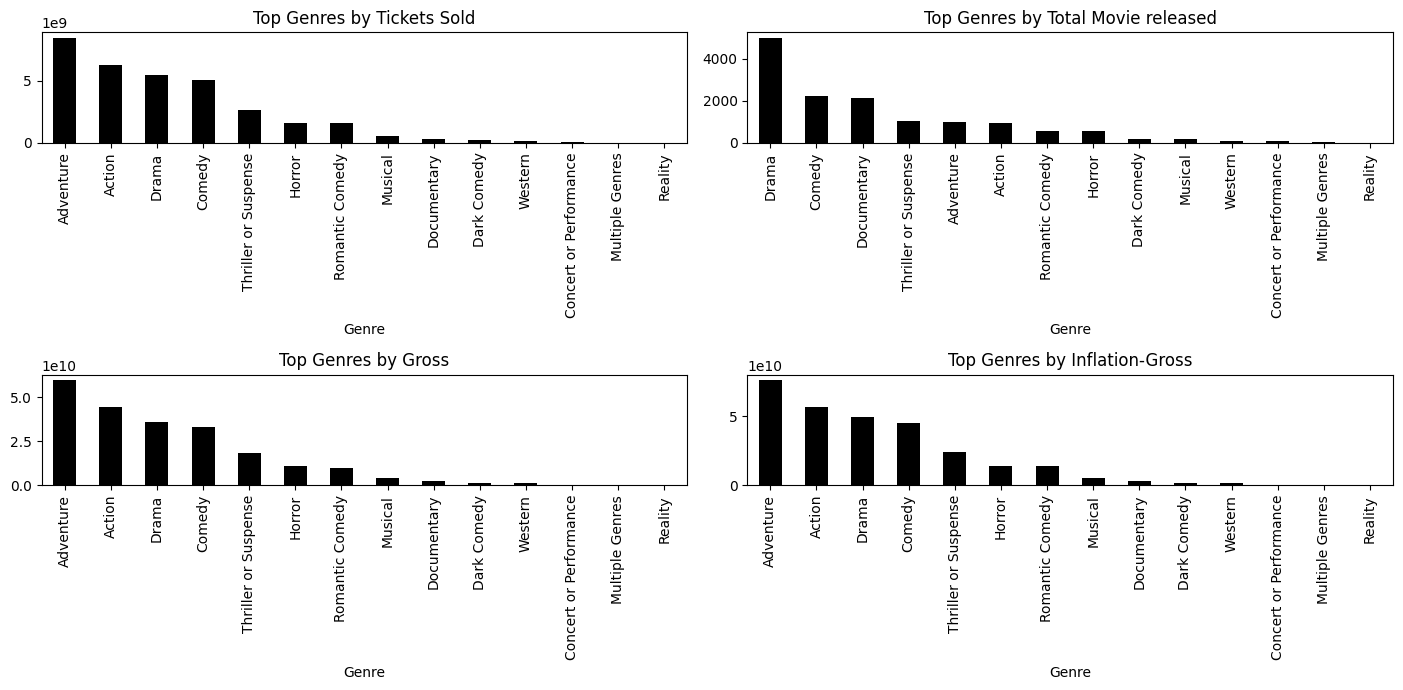

In [18]:
num_rows = 2; num_cols = 2
fig, axes = plt.subplots(num_rows,num_cols,figsize=(14,7))
total_tickets_sold = df.groupby(['Genre'])['Tickets Sold'].sum().sort_values(ascending=False)
total_tickets_sold.plot(color='black',kind='bar',ax=axes[0,0])
axes[0,0].set_title('Top Genres by Tickets Sold')

total_movies = df.groupby(['Genre'])['Movies Released'].sum().sort_values(ascending=False)
total_movies.plot(color='black',kind='bar',ax=axes[0,1])
axes[0,1].set_title('Top Genres by Total Movie released')

gross_net = df.groupby(['Genre'])['Gross'].sum().sort_values(ascending=False)
gross_net.plot(color='black',kind='bar',ax=axes[1,0])
axes[1,0].set_title('Top Genres by Gross')

inflation_gross = df.groupby(['Genre'])['Inflation-Adjusted Gross'].sum().sort_values(ascending=False)
inflation_gross.plot(color='black',kind='bar',ax=axes[1,1])
axes[1,1].set_title('Top Genres by Inflation-Gross')

plt.tight_layout()

In [19]:
# Selecting a few genres for analysis
selected_genres = ['Action', 'Comedy', 'Drama', 'Adventure','Thriller or Suspense','Horror']

filtered_df = df[df['Genre'].isin(selected_genres)]

# Create an interactive bar chart to show the highest-grossing movie in each genre and year
fig = px.bar(filtered_df, x='Year', y='Top Movie Gross (That Year)', color='Genre',
             title='Highest-Grossing Movies in Selected Genres Over Time',
             labels={'Top Movie Gross (That Year)': 'Gross Revenue'},
             text='Top Movie', height=1000)

fig.update_traces(textposition='outside')
fig.show()

### Machine Learning prediction about Inflation adjusted net revenue

In [23]:
from sklearn.model_selection import train_test_split

X = df[['Year', 'Movies Released', 'Genre', 'Tickets Sold', 'Gross']] # features
y = df[['Inflation-Adjusted Gross']] # target

In [21]:
# lets convert the categorical variables using one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

categorical_features = ['Year','Genre']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(),categorical_features)
    ],
    remainder = 'passthrough'
)

model = Pipeline([
    ('preprocessor',preprocessor),
    ('regressor',RandomForestRegressor(random_state=24))
])

In [62]:
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# Assuming y_test are the true values and y_pred are the predicted values
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.9997593342436174


/Users/solo/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

